一、資料讀取和套件載入

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv("hour.csv")
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<AxesSubplot:ylabel='Frequency'>

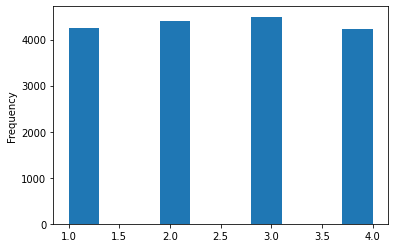

In [5]:
data["season"].plot.hist()

二、欄位刪除與資料結構轉換

In [6]:
df1=data.drop(columns=['dteday','yr','mnth','hr'])

df1.to_csv("bike_season.csv",index=False,encoding="utf-8-sig") #訓練用資料集
df1.describe()

,instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df3= df1
df3['season'] = labelencoder.fit_transform(df3['season'])
df3['holiday'] = labelencoder.fit_transform(df3['holiday'])
df3['weekday'] = labelencoder.fit_transform(df3['weekday'])
df3['workingday'] = labelencoder.fit_transform(df3['workingday'])
df3['weathersit'] = labelencoder.fit_transform(df3['weathersit'])
df3

,instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,6,0,0,0.24,0.2879,0.81,0.0000,3,13,16
1,2,0,0,6,0,0,0.22,0.2727,0.80,0.0000,8,32,40
2,3,0,0,6,0,0,0.22,0.2727,0.80,0.0000,5,27,32
3,4,0,0,6,0,0,0.24,0.2879,0.75,0.0000,3,10,13
4,5,0,0,6,0,0,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,0,0,1,1,1,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,0,0,1,1,1,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,0,0,1,1,0,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,0,0,1,1,0,0.26,0.2727,0.56,0.1343,13,48,61


三、正規化

In [8]:
train_mean=df3.mean(axis=0)
train_std=df3.std(axis=0)

In [9]:
df3-=train_mean
df3/=train_std
df3

,instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,-1.731901,-1.356595,-0.172107,1.493848,-1.466858,-0.665174,-1.334609,-1.093249,0.947345,-1.553844,-0.662736,-0.930162,-0.956312
1,-1.731702,-1.356595,-0.172107,1.493848,-1.466858,-0.665174,-1.438475,-1.181698,0.895513,-1.553844,-0.561326,-0.804632,-0.823998
2,-1.731503,-1.356595,-0.172107,1.493848,-1.466858,-0.665174,-1.438475,-1.181698,0.895513,-1.553844,-0.622172,-0.837666,-0.868103
3,-1.731303,-1.356595,-0.172107,1.493848,-1.466858,-0.665174,-1.334609,-1.093249,0.636351,-1.553844,-0.662736,-0.949983,-0.972851
4,-1.731104,-1.356595,-0.172107,1.493848,-1.466858,-0.665174,-1.334609,-1.093249,0.636351,-1.553844,-0.723582,-1.009445,-1.039008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.731104,-1.356595,-0.172107,-0.998959,0.681690,0.898898,-1.230743,-1.269565,-0.141133,-0.211685,-0.500481,-0.302509,-0.388467
17375,1.731303,-1.356595,-0.172107,-0.998959,0.681690,0.898898,-1.230743,-1.269565,-0.141133,-0.211685,-0.561326,-0.480894,-0.553859
17376,1.731503,-1.356595,-0.172107,-0.998959,0.681690,-0.665174,-1.230743,-1.269565,-0.141133,-0.211685,-0.581608,-0.467681,-0.548346
17377,1.731702,-1.356595,-0.172107,-0.998959,0.681690,-0.665174,-1.230743,-1.181698,-0.348463,-0.456086,-0.459917,-0.698922,-0.708224


四、拆分資料集

In [10]:
#cnt
from sklearn.model_selection import train_test_split


X = df3.loc[:,['instant','season','holiday','weekday','workingday','weathersit','temp','atemp',
'hum','windspeed','casual','registered','cnt']]
y = df3.loc[:,['cnt']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


In [11]:
df4=df3 #season
a = df4.loc[:,['instant','season','holiday','weekday','workingday','weathersit','temp','atemp',
'hum','windspeed','casual','registered','cnt']]
b = df4.loc[:,['season']]

a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.3)


五、建立model (cnt)

In [12]:
cnt_model1=Sequential()
cnt_model1.add(Dense(10,activation='relu',input_shape=(df3.shape[1],)))
cnt_model1.add(Dense(10,activation='relu'))
cnt_model1.add(Dense(10,activation='relu'))
cnt_model1.add(Dense(10,activation='relu'))
cnt_model1.add(Dense(1,activation='sigmoid'))
cnt_model1.compile(loss="mse", optimizer="adam",metrics=["mae"])

In [13]:
cnt_model2=Sequential()
cnt_model2.add(Dense(10,activation='relu',input_shape=(df3.shape[1],)))
cnt_model2.add(Dense(10,activation='relu'))
cnt_model1.add(Dense(10,activation='relu'))
cnt_model1.add(Dense(10,activation='relu'))
cnt_model2.add(Dense(1,activation='sigmoid'))
cnt_model2.compile(loss="mse", optimizer="rmsprop",metrics=["mape"])

In [14]:
cnt_model3=Sequential()
cnt_model3.add(Dense(10,activation='relu',input_shape=(df3.shape[1],)))
cnt_model3.add(Dense(10,activation='relu'))
cnt_model1.add(Dense(10,activation='relu'))
cnt_model1.add(Dense(10,activation='relu'))
cnt_model3.add(Dense(1,activation='sigmoid'))
cnt_model3.compile(loss="mse", optimizer="adam",metrics=["mse"])

六、建立model(season)

In [15]:
from keras import backend as K

def precision(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = TP / (Pred_Positives+K.epsilon())
        return precision

def recall(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = TP / (Positives+K.epsilon())    
        return recall 

def f1score(y_true, y_pred):
        def precision(y_true, y_pred):
                TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
                Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
                precision = TP / (Pred_Positives+K.epsilon())
                return precision
        def recall(y_true, y_pred):
                TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
                Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
                recall = TP / (Positives+K.epsilon())    
                return recall 
        precision, recall = precision(y_true, y_pred), recall(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [16]:
season_model1=Sequential()
season_model1.add(Dense(20,activation='relu',input_shape=(df4.shape[1],)))
season_model1.add(Dense(20,activation='relu'))
season_model1.add(Dense(1,activation='sigmoid'))
season_model1.compile(loss="mse", optimizer="adam",metrics=precision)

In [17]:
season_model2=Sequential()
season_model2.add(Dense(20,activation='relu',input_shape=(df4.shape[1],)))
season_model2.add(Dense(20,activation='relu'))
season_model2.add(Dense(1,activation='sigmoid'))
season_model2.compile(loss="mse", optimizer="adam",metrics=recall)

In [18]:
season_model3=Sequential()
season_model3.add(Dense(20,activation='relu',input_shape=(df4.shape[1],)))
season_model3.add(Dense(20,activation='relu'))
season_model3.add(Dense(1,activation='sigmoid'))
season_model3.compile(loss="mse", optimizer="adam",metrics=f1score)

七、資料匯入模型訓練(cnt)

In [19]:
cnt_model1.fit(X_train,y_train,epochs=10,batch_size=20)

Epoch 1/10
609/609 [==============================] - 1s 1ms/step - loss: 0.8649 - mae: 0.7223
Epoch 2/10
609/609 [==============================] - 1s 1ms/step - loss: 0.7925 - mae: 0.6762
Epoch 3/10
609/609 [==============================] - 1s 1ms/step - loss: 0.7915 - mae: 0.6729
Epoch 4/10
609/609 [==============================] - 1s 1ms/step - loss: 0.7912 - mae: 0.6716
Epoch 5/10
609/609 [==============================] - 1s 1ms/step - loss: 0.7910 - mae: 0.6707
Epoch 6/10
609/609 [==============================] - 1s 1ms/step - loss: 0.7908 - mae: 0.6696
Epoch 7/10
609/609 [==============================] - 1s 1ms/step - loss: 0.7907 - mae: 0.6687
Epoch 8/10
609/609 [==============================] - 1s 1ms/step - loss: 0.7907 - mae: 0.6681
Epoch 9/10
609/609 [==============================] - 1s 1ms/step - loss: 0.7906 - mae: 0.6677
Epoch 10/10
609/609 [==============================] - 1s 1ms/step - loss: 0.7907 - mae: 0.6678


In [20]:
cnt_model2.fit(X_train,y_train,epochs=10,batch_size=20)

Epoch 1/10
609/609 [==============================] - 1s 1ms/step - loss: 0.7989 - mape: 214.1034
Epoch 2/10
609/609 [==============================] - 1s 856us/step - loss: 0.5207 - mape: 89.6689
Epoch 3/10
609/609 [==============================] - 1s 884us/step - loss: 0.5133 - mape: 83.3800
Epoch 4/10
609/609 [==============================] - 1s 857us/step - loss: 0.5113 - mape: 79.4713
Epoch 5/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5104 - mape: 76.2480
Epoch 6/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5099 - mape: 73.2563
Epoch 7/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5096 - mape: 71.5774
Epoch 8/10
609/609 [==============================] - 1s 918us/step - loss: 0.5094 - mape: 70.7100
Epoch 9/10
609/609 [==============================] - 1s 902us/step - loss: 0.5093 - mape: 70.0462
Epoch 10/10
609/609 [==============================] - 1s 926us/step - loss: 0.5092 - mape: 69.6522


In [21]:
cnt_model3.fit(X_train,y_train,epochs=10,batch_size=20)

Epoch 1/10
609/609 [==============================] - 1s 1ms/step - loss: 0.7143 - mse: 0.7143
Epoch 2/10
609/609 [==============================] - 1s 829us/step - loss: 0.5209 - mse: 0.5209
Epoch 3/10
609/609 [==============================] - 0s 808us/step - loss: 0.5153 - mse: 0.5153
Epoch 4/10
609/609 [==============================] - 1s 852us/step - loss: 0.5137 - mse: 0.5137
Epoch 5/10
609/609 [==============================] - 1s 928us/step - loss: 0.5125 - mse: 0.5125
Epoch 6/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5117 - mse: 0.5117
Epoch 7/10
609/609 [==============================] - 1s 980us/step - loss: 0.5112 - mse: 0.5112
Epoch 8/10
609/609 [==============================] - 1s 901us/step - loss: 0.5108 - mse: 0.5108
Epoch 9/10
609/609 [==============================] - 0s 803us/step - loss: 0.5105 - mse: 0.5105
Epoch 10/10
609/609 [==============================] - 1s 897us/step - loss: 0.5102 - mse: 0.5102


八、資料匯入模型訓練(season)

In [22]:
season_model1.fit(a_train,b_train,epochs=10,batch_size=20)

Epoch 1/10
609/609 [==============================] - 1s 1ms/step - loss: 0.6593 - precision: 131363.0781
Epoch 2/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5385 - precision: 0.7527
Epoch 3/10
609/609 [==============================] - 0s 787us/step - loss: 0.5352 - precision: 0.8016
Epoch 4/10
609/609 [==============================] - 1s 888us/step - loss: 0.5343 - precision: 0.8429
Epoch 5/10
609/609 [==============================] - 1s 903us/step - loss: 0.5339 - precision: 0.8709
Epoch 6/10
609/609 [==============================] - 1s 922us/step - loss: 0.5337 - precision: 0.8994
Epoch 7/10
609/609 [==============================] - 1s 892us/step - loss: 0.5336 - precision: 0.9109
Epoch 8/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5335 - precision: 0.9226
Epoch 9/10
609/609 [==============================] - 1s 852us/step - loss: 0.5334 - precision: 0.9392
Epoch 10/10
609/609 [==============================] - 1s 899us/step - los

In [23]:
season_model2.fit(a_train,b_train,epochs=10,batch_size=20)

Epoch 1/10
609/609 [==============================] - 1s 957us/step - loss: 0.6921 - recall: 0.9042
Epoch 2/10
609/609 [==============================] - 1s 941us/step - loss: 0.5384 - recall: 0.9967
Epoch 3/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5353 - recall: 0.9967
Epoch 4/10
609/609 [==============================] - 1s 853us/step - loss: 0.5344 - recall: 0.9967
Epoch 5/10
609/609 [==============================] - 1s 977us/step - loss: 0.5340 - recall: 0.9934
Epoch 6/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5338 - recall: 0.9967
Epoch 7/10
609/609 [==============================] - 1s 828us/step - loss: 0.5336 - recall: 1.0000
Epoch 8/10
609/609 [==============================] - 0s 744us/step - loss: 0.5335 - recall: 0.9967
Epoch 9/10
609/609 [==============================] - 1s 991us/step - loss: 0.5334 - recall: 0.9934
Epoch 10/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5334 - recall: 0.9951


In [24]:
season_model3.fit(a_train,b_train,epochs=10,batch_size=20)

Epoch 1/10
609/609 [==============================] - 1s 1ms/step - loss: 0.6681 - f1score: 0.8911
Epoch 2/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5400 - f1score: 0.8499
Epoch 3/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5357 - f1score: 0.8774
Epoch 4/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5345 - f1score: 0.9029
Epoch 5/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5340 - f1score: 0.9171
Epoch 6/10
609/609 [==============================] - 1s 882us/step - loss: 0.5338 - f1score: 0.9362
Epoch 7/10
609/609 [==============================] - 1s 853us/step - loss: 0.5336 - f1score: 0.9459
Epoch 8/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5335 - f1score: 0.9585
Epoch 9/10
609/609 [==============================] - 1s 1ms/step - loss: 0.5334 - f1score: 0.9638A: 0s - loss: 0.5266 - f1scor
Epoch 10/10
609/609 [==============================] - 1s 828us/step - loss:

八、績效評估(cnt)

In [25]:
loss,mae_score= cnt_model1.evaluate(X_test,y_test)         
print("lose= {:.2f}".format(loss))
print("mae= {:.2f}".format(mae_score))

163/163 [==============================] - 0s 1ms/step - loss: 0.8069 - mae: 0.6747
lose= 0.81
mae= 0.67


In [26]:
loss,mape_score= cnt_model2.evaluate(X_test,y_test)         
print("lose= {:.2f}".format(loss))
print("mape= {:.2f}".format(mape_score))

163/163 [==============================] - 0s 905us/step - loss: 0.5273 - mape: 70.9958
lose= 0.53
mape= 71.00


In [27]:
loss,mse_score= cnt_model3.evaluate(X_test,y_test)         
print("lose= {:.2f}".format(loss))
print("mse= {:.2f}".format(mse_score))

163/163 [==============================] - 0s 826us/step - loss: 0.5282 - mse: 0.5282
lose= 0.53
mse= 0.53


九、績效評估(season)

In [28]:
loss,precision_score= season_model1.evaluate(a_test,b_test)         
print("lose= {:.2f}".format(loss))
print("precision= {:.2f}".format(precision_score))

163/163 [==============================] - 0s 973us/step - loss: 0.5291 - precision: 0.9862
lose= 0.53
precision= 0.99


In [29]:
loss,recall_score= season_model2.evaluate(a_test,b_test)         
print("lose= {:.2f}".format(loss))
print("recall= {:.2f}".format(recall_score))

163/163 [==============================] - 0s 817us/step - loss: 0.5292 - recall: 1.0000
lose= 0.53
recall= 1.00


In [30]:
loss,f1_score= season_model3.evaluate(a_test,b_test)         
print("lose= {:.2f}".format(loss))
print("F1= {:.2f}".format(f1_score))

163/163 [==============================] - 0s 876us/step - loss: 0.5291 - f1score: 0.9667
lose= 0.53
F1= 0.97
